## **XGBoost Classifier**

-

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import xgboost as xgb

**Data**

In [2]:
# Path 
file_path = 'data.csv'

# read the data
data = pd.read_csv(file_path)
if 'Unnamed: 0' in data.columns: 
    data.drop('Unnamed: 0', axis=1, inplace=True)

**Model**

In [3]:
# Separate the features and the target variable
X = data.iloc[:, :-1]  # last column is the target
y = data.iloc[:, -1]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Shapes 
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (39617, 9)
X_test shape: (9905, 9)
y_train shape: (39617,)
y_test shape: (9905,)


In [14]:
# Define the XGBoost model with custom hyperparameters
model = xgb.XGBClassifier(
    n_estimators=800,      # Number of boosting rounds
    learning_rate=0.1,     # Step size shrinkage used to prevent overfitting
    max_depth=3,           # Maximum tree depth for base learners
    random_state=42,       # Random state for reproducibility
    use_label_encoder=False,  # Disable use of label encoder
    eval_metric='logloss'  # Evaluation metric
)

In [15]:
# Measure the training time
start_time = time.time()

print("Starting training...")

# Train the model
model.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds")

Starting training...


c:\Users\91790\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training completed in 22.40 seconds


In [16]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8662291771832408


In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_matrix)

Confusion Matrix: [[1952   34   14    2    2    2    9    4    7    1    3   12]
 [  11 1408    0   13   11    3    4   18   58   10    9    2]
 [   6   34  955    3    3    1    0    0    2    1    1    4]
 [   2   61    0  222   19    0    4   14   45    7    2    0]
 [   1   66    2   30  199    1    8   19   81    9    5    0]
 [   1    0    0    0    0  260   24    2    0    4   12    0]
 [   2   16    0    3    5   14  503    5   11    0    4    0]
 [   1   23    0   11   11    4    8  277   42   10   15    0]
 [   3  158    0   22   27    1    8   27  509   15    9    1]
 [   0   10    0    6    4    4    2    6   15  207    9    0]
 [   4   16    0    1    9   10    4   11    5   15  292    1]
 [   3   18    2    0    1    0    2    1    5    1    1 1796]]


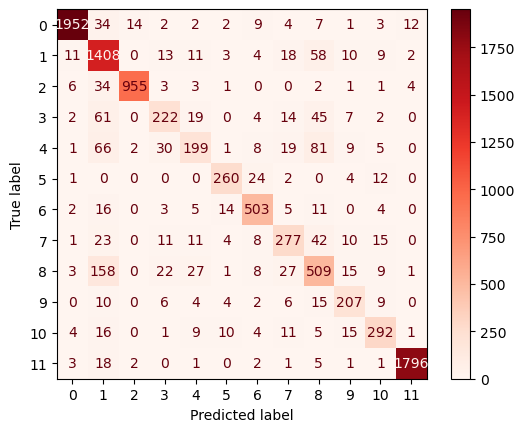

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.show()

**Save the model**

In [23]:
# Save the model 
import joblib
import os

# Replace with the path to your desired folder
folder_path = "saved_models"
model_filename = "xg_boost.pkl"
full_path = os.path.join(folder_path, model_filename)

# Ensure the directory exists
os.makedirs(folder_path, exist_ok=True)

# Save the trained SVM model
joblib.dump(model, full_path)

print(f"Model saved at {full_path}")

Model saved at saved_models\xg_boost.pkl
